In [1]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset Iris
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np


# Cargar dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


#  Paso 2: Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names


In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


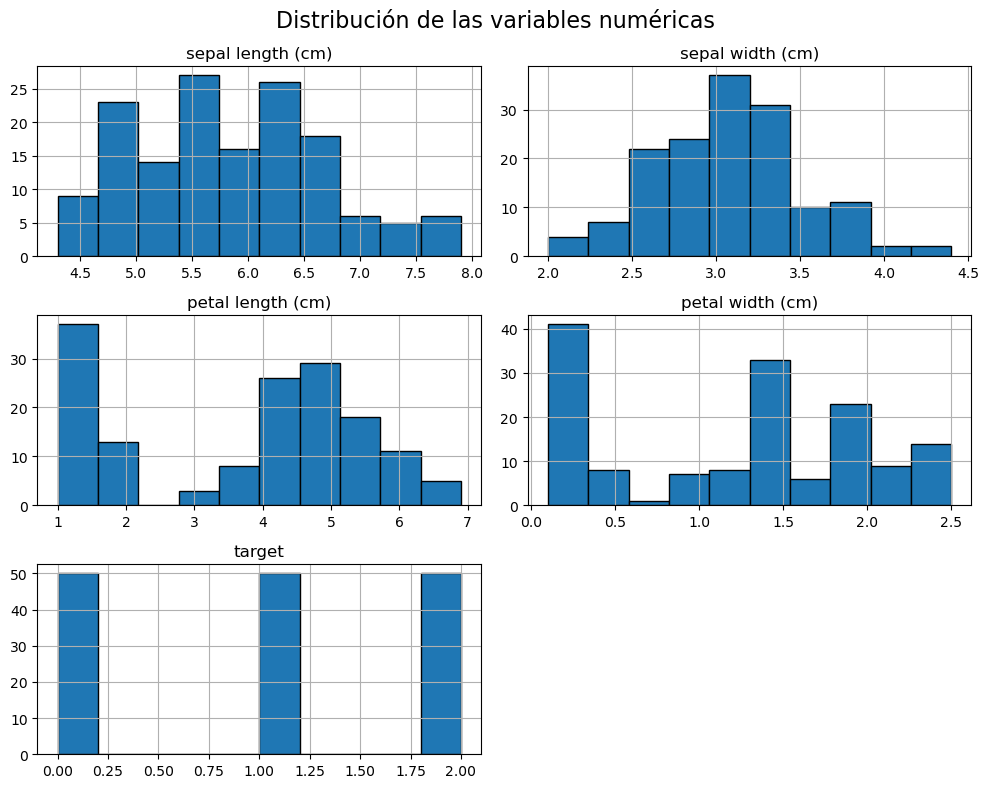

In [3]:
# Histograma general
df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

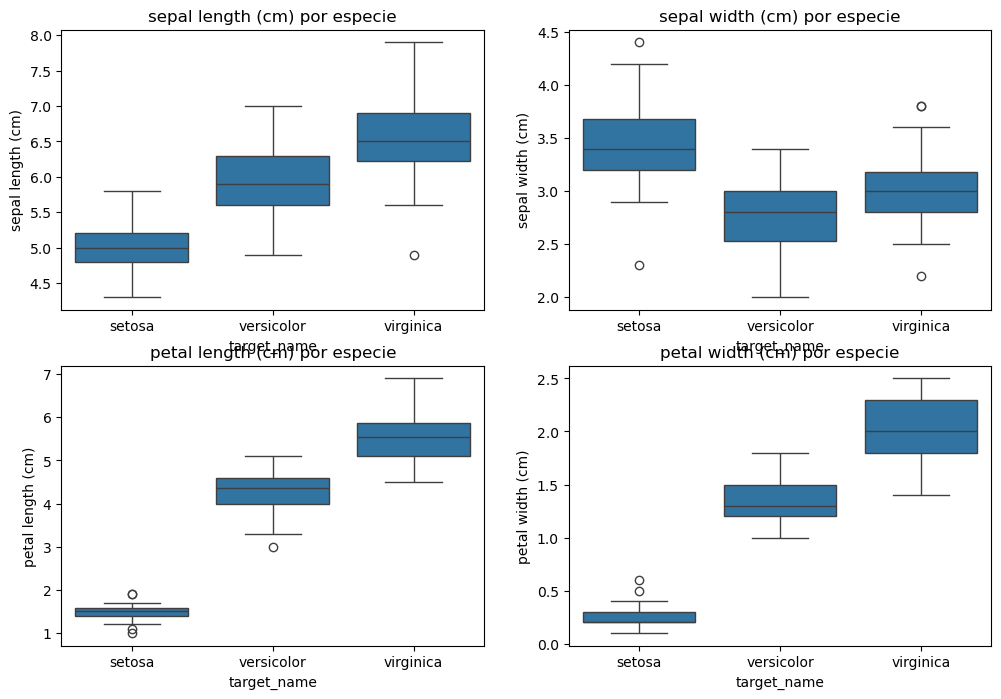

In [95]:
# Boxplots de cada característica por especie
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='target_name', y=col, data=df)
    plt.title(f"{col} por especie")
plt.tight_layout()
plt.show()

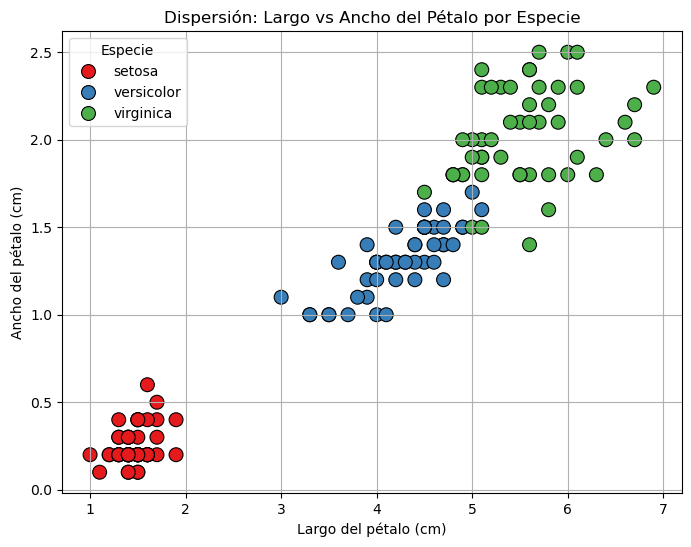

In [44]:
# Gráfico de dispersión: largo vs ancho del pétalo
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="target_name",
    palette="Set1",
    s=100,
    edgecolor="black"
)
plt.title("Dispersión: Largo vs Ancho del Pétalo por Especie")
plt.xlabel("Largo del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.legend(title="Especie")
plt.grid(True)
plt.show()

## Paso 2: Simular una división del nodo
Dividiremos el nudo usando el atributo longitud del pétalo < 2.5 :

In [7]:
# División arbitraria: petal length < 2.45
grupo_izq = df[df['petal length (cm)'] < 2.45]
grupo_der = df[df['petal length (cm)'] >= 2.45]

print("Tamaño del grupo izquierdo:", len(grupo_izq))
print("Tamaño del grupo derecho:", len(grupo_der))

Tamaño del grupo izquierdo: 50
Tamaño del grupo derecho: 100


### ✅ Paso 3: Calcular el Índice Gini para cada grupo

Usamos la siguiente **fórmula del índice Gini**:

$$
\text{Gini} = 1 - \sum_{i=1}^{k} p_i^2
$$

Donde:

- \( p_i \) es la **proporción de la clase \( i \)** en el grupo.
- \( k \) es el número total de clases en ese grupo.





In [9]:
def calcular_gini(grupo):
    clases = grupo['target'].value_counts(normalize=True)
    gini = 1 - np.sum(clases**2)
    return gini

gini_izq = calcular_gini(grupo_izq)
gini_der = calcular_gini(grupo_der)

print(f"Gini Izquierdo: {gini_izq:.4f}")
print(f"Gini Derecho: {gini_der:.4f}")

Gini Izquierdo: 0.0000
Gini Derecho: 0.5000


### ✅ Paso 4: Calcular el Gini ponderado total

La fórmula para el Gini total de la división es:

$$
\text{Gini}_{\text{división}} =
\frac{n_{\text{izq}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{izq}} +
\frac{n_{\text{der}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{der}}
$$


Donde:

$$
n_{\text{izq}} \quad \text{: número de muestras en el grupo izquierdo}
$$

$$
n_{\text{der}} \quad \text{: número de muestras en el grupo derecho}
$$

$$
n_{\text{total}} = n_{\text{izq}} + n_{\text{der}} \quad \text{: total de muestras}
$$

$$
\text{Gini}_{\text{izq}} \quad \text{: índice Gini del grupo izquierdo}
$$

$$
\text{Gini}_{\text{der}} \quad \text{: índice Gini del grupo derecho}
$$


Este valor representa la **impureza ponderada** de la división.  
Un valor más bajo indica que los subgrupos son más puros y, por tanto, la división es mejor.







In [12]:
n_total = len(df)
n_izq = len(grupo_izq)
n_der = len(grupo_der)

gini_total = (n_izq / n_total) * gini_izq + (n_der / n_total) * gini_der
print(f"Gini ponderado total de la división: {gini_total:.4f}")

Gini ponderado total de la división: 0.3333


### ✅ Cálculo de la Entropía ponderada total

La entropía mide la impureza de un grupo, y se calcula con la fórmula:

$$
\text{Entropía} = - \sum_{i=1}^{k} p_i \cdot \log_2(p_i)
$$

Donde:

- \( p_i \): proporción de la clase \( i \) dentro del grupo.  
- \( k \): número total de clases.  

Cuando se divide un nodo en dos grupos (izquierdo y derecho), se calcula la entropía ponderada así:

$$
\text{Entropía}_{\text{división}} =
\frac{n_{\text{izq}}}{n_{\text{total}}} \cdot \text{Entropía}_{\text{izq}} +
\frac{n_{\text{der}}}{n_{\text{total}}} \cdot \text{Entropía}_{\text{der}}
$$

Donde:

$$
n_{\text{izq}} \quad \text{: número de muestras en el grupo izquierdo}
$$

$$
n_{\text{der}} \quad \text{: número de muestras en el grupo derecho}
$$

$$
n_{\text{total}} = n_{\text{izq}} + n_{\text{der}} \quad \text{: total de muestras}
$$

$$
\text{Entropía}_{\text{izq}} \quad \text{: entropía del grupo izquierdo}
$$

$$
\text{Entropía}_{\text{der}} \quad \text{: entropía del grupo derecho}
$$



In [15]:

# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)  # criterion='entropy'
clf.fit(X_train, y_train)

# 4. Evaluar el modeloz
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Reporte de clasificación:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



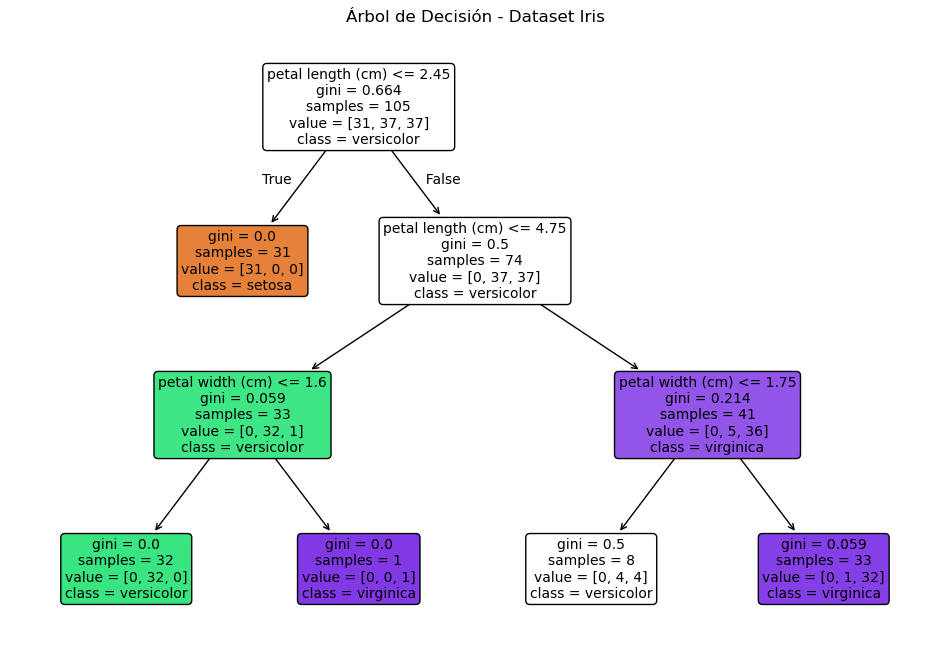

In [17]:
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

In [19]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), parametros, cv=5)
grid.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid.best_params_)



Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 3}


In [31]:
# 5. Crear DataFrame con resultados
df_resultados = pd.DataFrame(X_test, columns=feature_names)
df_resultados["Clase real"] = [target_names[i] for i in y_test]
df_resultados["Clase predicha"] = [target_names[i] for i in y_pred]

In [33]:
# 6. Exportar a Excel
df_resultados.to_excel("resultados_iris.xlsx", index=False)

In [46]:
df["Clase predicha"]= clf.predict(X)

df["Clase predicha"]=[target_names[i] for i in y]

In [50]:
df.head()

df.to_excel("resultados_iris_full.xlsx", index=False)